# Procedure
1. Data import
2. Normarize & One-hot encording
3. Create Model
4. Deep Learning
5. Check history(Graph)
6. Evaluate

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# TensorFlowとKerasまわりのimport
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
#from keras.layers.normalization import BatchNormalization
#from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img

# ヘルパーライブラリのimport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2
import os
import glob
from PIL import Image

print(tf.__version__)
print(cv2.__version__)

# GPUの使用を確認
print(tf.test.gpu_device_name())

2.6.0
4.1.2
/device:GPU:0


In [70]:
# zipファイルの解凍
# Colab上では"!"をつけることでLinuxコマンドを使用可
!date -R
!unzip -qq drive/My\ Drive/train.zip
!date -R
!ls

Fri, 20 Aug 2021 07:02:59 +0000
unzip:  cannot find or open drive/My Drive/train.zip, drive/My Drive/train.zip.zip or drive/My Drive/train.zip.ZIP.
Fri, 20 Aug 2021 07:02:59 +0000
 adc.json     'train_0 (1).jpg'   train_1.jpg   train_4.jpg   train_7.jpg
 drive	       train_0.jpg	  train_2.jpg   train_5.jpg   train_8.jpg
 sample_data   train_10.jpg	  train_3.jpg   train_6.jpg   train_9.jpg


In [81]:
!unzip "/content/drive/MyDrive/04_Google Colaboratory/210818_手描き文字認識/train.zip"

ストリーミング出力は最後の 5000 行に切り捨てられました。
 extracting: train/train_59499.jpg   
 extracting: train/train_595.jpg     
 extracting: train/train_5950.jpg    
 extracting: train/train_59500.jpg   
 extracting: train/train_59501.jpg   
 extracting: train/train_59502.jpg   
 extracting: train/train_59503.jpg   
 extracting: train/train_59504.jpg   
 extracting: train/train_59505.jpg   
 extracting: train/train_59506.jpg   
 extracting: train/train_59507.jpg   
 extracting: train/train_59508.jpg   
 extracting: train/train_59509.jpg   
 extracting: train/train_5951.jpg    
 extracting: train/train_59510.jpg   
 extracting: train/train_59511.jpg   
 extracting: train/train_59512.jpg   
 extracting: train/train_59513.jpg   
 extracting: train/train_59514.jpg   
 extracting: train/train_59515.jpg   
 extracting: train/train_59516.jpg   
 extracting: train/train_59517.jpg   
 extracting: train/train_59518.jpg   
 extracting: train/train_59519.jpg   
 extracting: train/train_5952.jpg    
 extracting: train

In [97]:
!unzip "/content/drive/MyDrive/04_Google Colaboratory/210818_手描き文字認識/test.zip"

ストリーミング出力は最後の 5000 行に切り捨てられました。
 extracting: test/test_5499.jpg      
 extracting: test/test_55.jpg        
 extracting: test/test_550.jpg       
 extracting: test/test_5500.jpg      
 extracting: test/test_5501.jpg      
 extracting: test/test_5502.jpg      
 extracting: test/test_5503.jpg      
 extracting: test/test_5504.jpg      
 extracting: test/test_5505.jpg      
 extracting: test/test_5506.jpg      
 extracting: test/test_5507.jpg      
 extracting: test/test_5508.jpg      
 extracting: test/test_5509.jpg      
 extracting: test/test_551.jpg       
 extracting: test/test_5510.jpg      
 extracting: test/test_5511.jpg      
 extracting: test/test_5512.jpg      
 extracting: test/test_5513.jpg      
 extracting: test/test_5514.jpg      
 extracting: test/test_5515.jpg      
 extracting: test/test_5516.jpg      
 extracting: test/test_5517.jpg      
 extracting: test/test_5518.jpg      
 extracting: test/test_5519.jpg      
 extracting: test/test_552.jpg       
 extracting: test/

In [ ]:
!ls

In [83]:
import matplotlib.pyplot as plt
import os
import cv2
import glob
import numpy as np

In [84]:
#階層移動
os.chdir("/content/train")
#階層内のPathを全取得
path = glob.glob("*")
print(path)

['train_39915.jpg', 'train_25957.jpg', 'train_35282.jpg', 'train_56286.jpg', 'train_41098.jpg', 'train_50496.jpg', 'train_15823.jpg', 'train_6733.jpg', 'train_12961.jpg', 'train_47196.jpg', 'train_49349.jpg', 'train_19230.jpg', 'train_7219.jpg', 'train_46211.jpg', 'train_53577.jpg', 'train_16391.jpg', 'train_52518.jpg', 'train_35523.jpg', 'train_4353.jpg', 'train_16229.jpg', 'train_52280.jpg', 'train_36266.jpg', 'train_437.jpg', 'train_34066.jpg', 'train_19278.jpg', 'train_34038.jpg', 'train_45157.jpg', 'train_54702.jpg', 'train_16901.jpg', 'train_21895.jpg', 'train_51259.jpg', 'train_8900.jpg', 'train_15.jpg', 'train_13634.jpg', 'train_41009.jpg', 'train_2460.jpg', 'train_28670.jpg', 'train_55420.jpg', 'train_51487.jpg', 'train_89.jpg', 'train_38502.jpg', 'train_20475.jpg', 'train_1323.jpg', 'train_11596.jpg', 'train_35704.jpg', 'train_2524.jpg', 'train_8564.jpg', 'train_14109.jpg', 'train_51799.jpg', 'train_15650.jpg', 'train_22212.jpg', 'train_28844.jpg', 'train_35928.jpg', 'train_3

In [99]:
#階層移動
os.chdir("/content/test")
#階層内のPathを全取得
path = glob.glob("*")

FileNotFoundError: ignored

In [91]:
#データセットを格納する変数
training_data = []
#リサイズ後のサイズ
IMG_SIZE = 28

#個別のFilePathに対して処理していきます。
for p in path:
   pathEach = p
   #print(pathEach)

#NumPy配列ndarrayとして読み込まれ、ndarrayを画像として保存
   imageTTTT = cv2.imread(pathEach,cv2.IMREAD_GRAYSCALE)
   img_resize_array = cv2.resize(imageTTTT, (IMG_SIZE, IMG_SIZE))
   training_data.append(img_resize_array)

In [95]:
print(training_data[0].shape)

(28, 28)


In [96]:
len(training_data)

60000

(32, 32, 3)


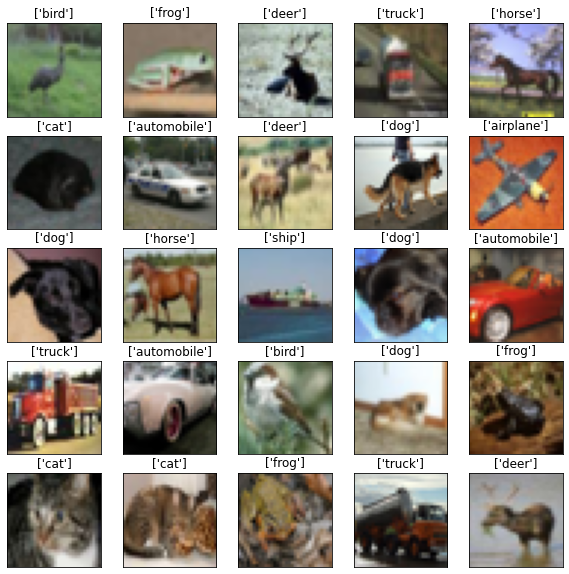

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split



train = training_data

#train = train.load_data()
print(train[0].shape)

mnist_labels = np.array(["0", "1", "2", "3", "4",
                           "5", "6", "7", "8", "9"])

n_image = 9
rand_id = np.random.randint(0, len(x_train), n_image)


plt.figure(figsize=(10,10))

for i in range(n_image):
  #cifar_img = plt.subplot(3,3, i+1)
  plt.subplot(5,5, i+1)
  plt.imshow(x_train[rand_id[i]])
  label = cifar10_labels[t_train[rand_id[i]]]
  plt.title(label)
  plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False) 



In [ ]:
from keras.utils import np_utils

t_train = np_utils.to_categorical(t_train)
t_test = np_utils.to_categorical(t_test)
print(t_train[:10])

x_train = x_train / 255
x_test = x_test / 255

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

n_class = 10

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))  # ドロップアウト
model.add(Dense(n_class))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 15, 15, 64)       

In [ ]:
history = model.fit(x_train, t_train, epochs=10, batch_size=100, validation_data=(x_test, t_test))

Epoch 1/10
500/500 [==============================] - 6s 10ms/step - loss: 1.8051 - accuracy: 0.3315 - val_loss: 1.2032 - val_accuracy: 0.5807
Epoch 2/10
500/500 [==============================] - 4s 9ms/step - loss: 1.2316 - accuracy: 0.5618 - val_loss: 1.0607 - val_accuracy: 0.6268
Epoch 3/10
500/500 [==============================] - 5s 9ms/step - loss: 1.0328 - accuracy: 0.6367 - val_loss: 0.8958 - val_accuracy: 0.6884
Epoch 4/10
500/500 [==============================] - 5s 9ms/step - loss: 0.8984 - accuracy: 0.6870 - val_loss: 0.8268 - val_accuracy: 0.7128
Epoch 5/10
500/500 [==============================] - 5s 9ms/step - loss: 0.7904 - accuracy: 0.7250 - val_loss: 0.8047 - val_accuracy: 0.7147
Epoch 6/10
500/500 [==============================] - 4s 9ms/step - loss: 0.7183 - accuracy: 0.7494 - val_loss: 0.7635 - val_accuracy: 0.7349
Epoch 7/10
500/500 [==============================] - 5s 9ms/step - loss: 0.6571 - accuracy: 0.7694 - val_loss: 0.7250 - val_accuracy: 0.7442
Epoch

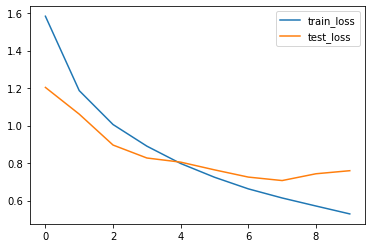

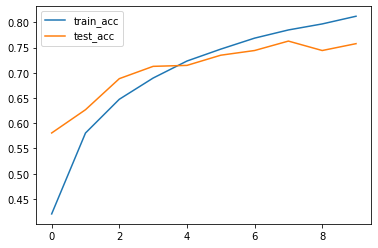

In [ ]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]

plt.plot(np.arange(len(train_loss)), train_loss, label="train_loss")
plt.plot(np.arange(len(test_loss)), test_loss, label="test_loss")
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label="train_acc")
plt.plot(np.arange(len(train_acc)), test_acc, label="test_acc")
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.7591 - accuracy: 0.7578
0.7590503692626953 0.7577999830245972


In [ ]:
n_image = 25
rand_id = np.random.randint(0, len(x_train), n_image)


plt.figure(figsize=(10,10))

for i in range(n_image):
  #cifar_img = plt.subplot(5,5, i+1)
  plt.subplot(5,5, i+1)
  plt.imshow(x_train[rand_id[i]])
  label = cifar10_labels[t_train[rand_id[i]]]
  plt.title(label)
  plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False) 

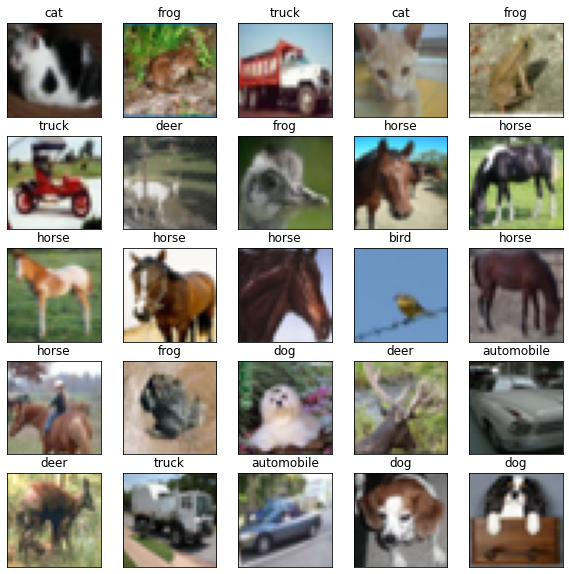

In [ ]:
n_image = 25
rand_id2 = np.random.randint(0, len(x_test), n_image)

y_rand = model.predict(x_test[rand_id2])
predicted_class = np.argmax(y_rand, axis=1)

plt.figure(figsize=(10, 10))  # 画像の表示サイズ
for i in range(n_image):
    cifar_img=plt.subplot(5, 5, i+1)
    plt.imshow(x_test[rand_id2[i]])
    label = cifar10_labels[predicted_class[i]]
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.show()